In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("/content/customer_segmentation_retail.csv")

# Inspect the dataset
print(data.head())
print(data.info())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Drop unnecessary columns if needed (e.g., CustomerID)
data.drop(columns=["CustomerID"], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=["Gender", "MembershipTier", "Region", "PreferredCategory", "RecentPurchase"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ["Age", "AnnualIncome", "SpendingScore", "LoyaltyPoints"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())


   CustomerID  Age      Gender  AnnualIncome  SpendingScore MembershipTier  \
0           1   27  Non-Binary      77778.54             50         Silver   
1           2   66  Non-Binary      84797.91             16           Gold   
2           3   55      Female      82841.51             79        Diamond   
3           4   31  Non-Binary     139825.79             26       Platinum   
4           5   20        Male      62388.36             40         Silver   

  Region PreferredCategory  LoyaltyPoints RecentPurchase  
0  South        Home Decor            327             No  
1  North              Toys            869            Yes  
2  North        Home Decor           2143            Yes  
3   East            Sports           2984            Yes  
4  North            Beauty           8591             No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------           

                Age  AnnualIncome  SpendingScore  LoyaltyPoints
count  6.000000e+03  6.000000e+03   6.000000e+03   6.000000e+03
mean  -2.297422e-16  8.378483e-17  -7.579123e-17   9.177844e-17
std    1.000083e+00  1.000083e+00   1.000083e+00   1.000083e+00
min   -1.735888e+00 -1.724703e+00  -1.742014e+00  -1.740644e+00
25%   -8.764448e-01 -8.825179e-01  -8.706089e-01  -8.531734e-01
50%   -1.700155e-02  3.575522e-02   3.565208e-02   1.411783e-02
75%    8.424417e-01  8.702395e-01   8.722007e-01   8.797564e-01
max    1.701885e+00  1.701681e+00   1.708749e+00   1.738610e+00


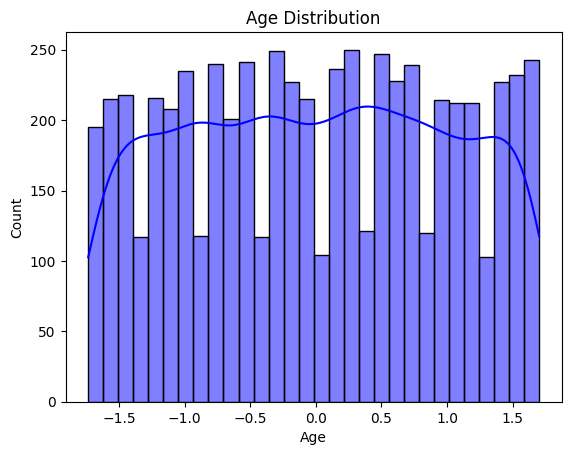

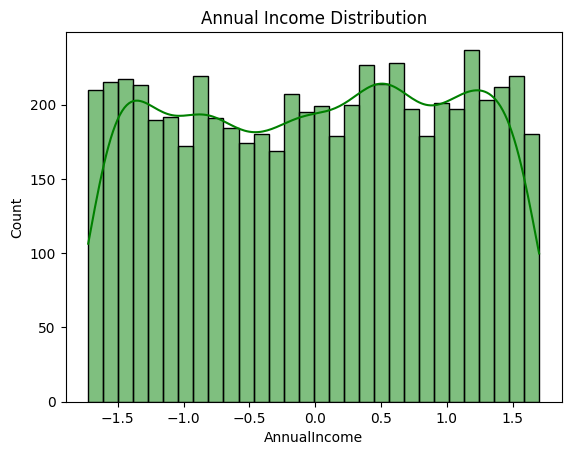

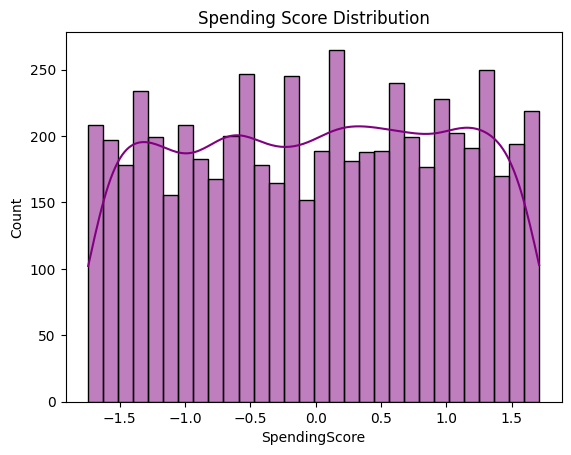

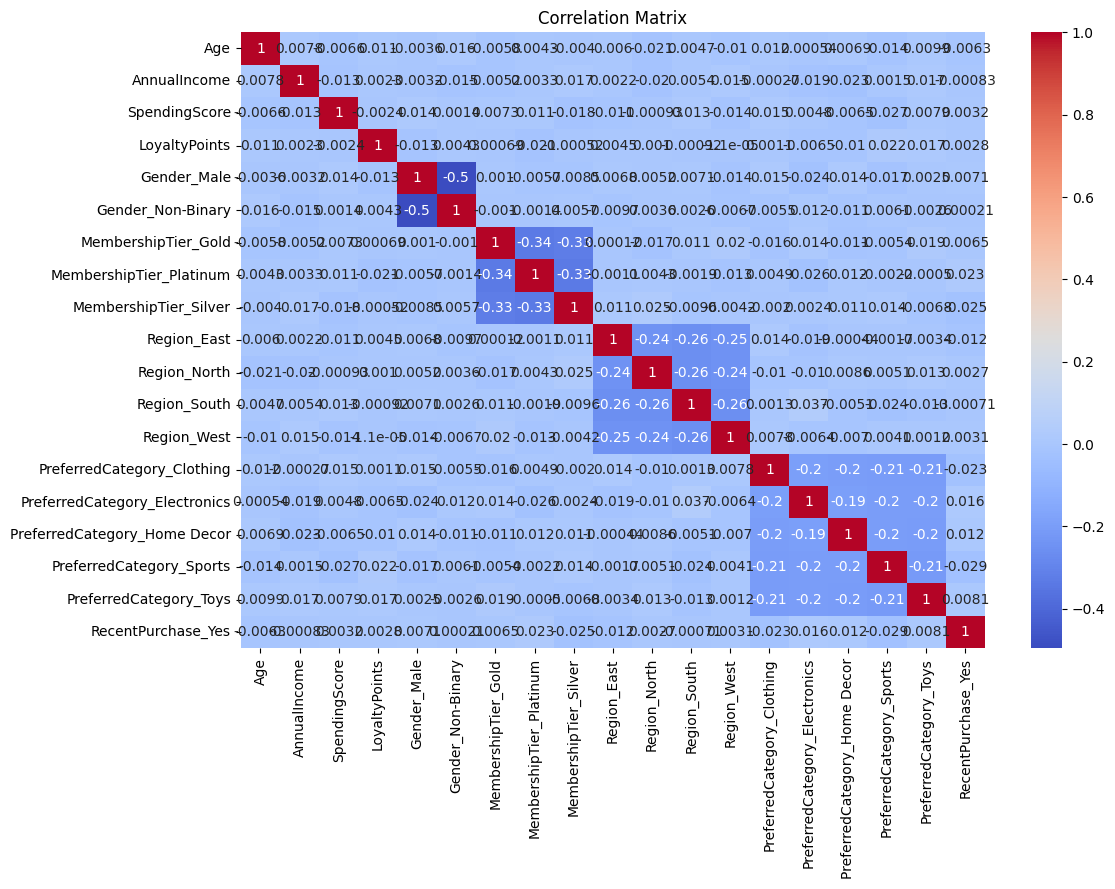

In [2]:
# Summary statistics
print(data.describe())

# Distribution of Age, Annual Income, and Spending Score
sns.histplot(data["Age"], kde=True, bins=30, color="blue")
plt.title("Age Distribution")
plt.show()

sns.histplot(data["AnnualIncome"], kde=True, bins=30, color="green")
plt.title("Annual Income Distribution")
plt.show()

sns.histplot(data["SpendingScore"], kde=True, bins=30, color="purple")
plt.title("Spending Score Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


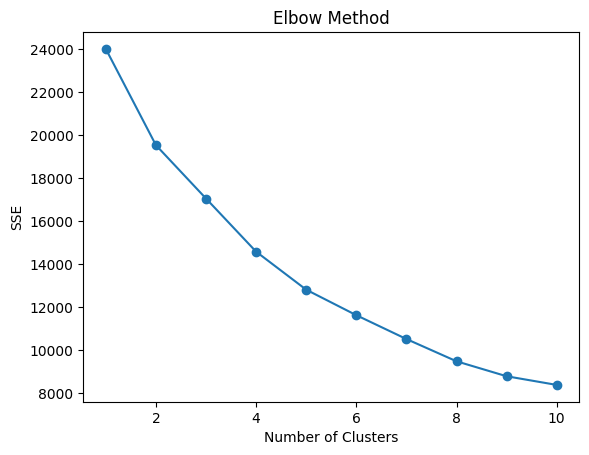

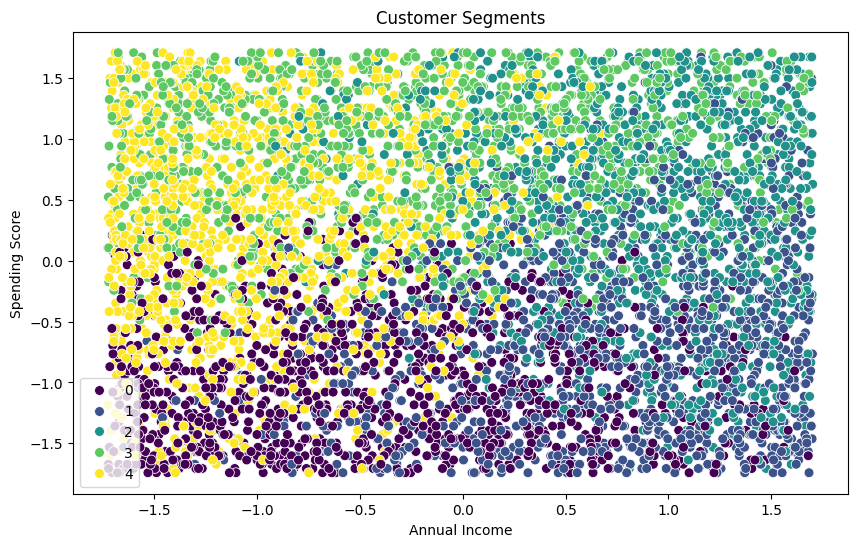

In [3]:
# K-Means Clustering
kmeans_features = ["Age", "AnnualIncome", "SpendingScore", "LoyaltyPoints"]
X = data[kmeans_features]

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), sse, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data["Cluster"] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data["AnnualIncome"],
    y=data["SpendingScore"],
    hue=data["Cluster"],
    palette="viridis",
    s=50,
)
plt.title("Customer Segments")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


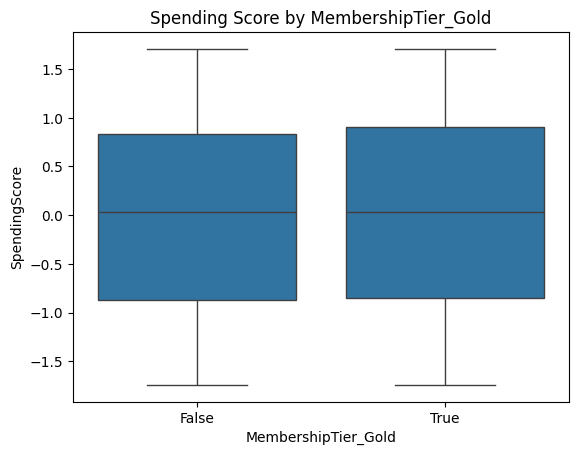

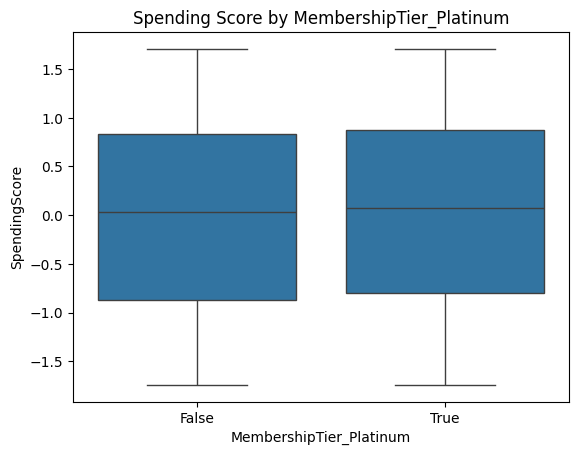

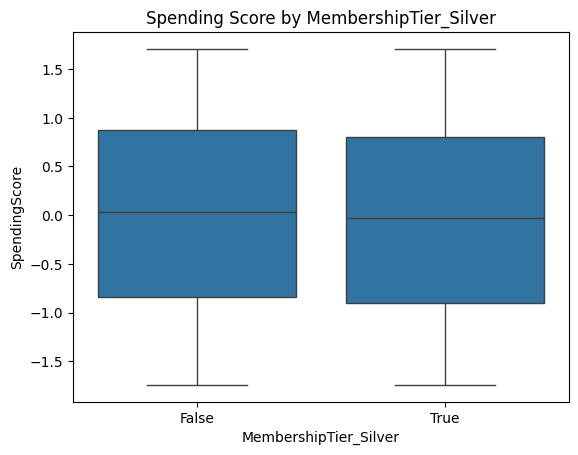

<ipython-input-4-b0b5e1cbcded>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="pastel")


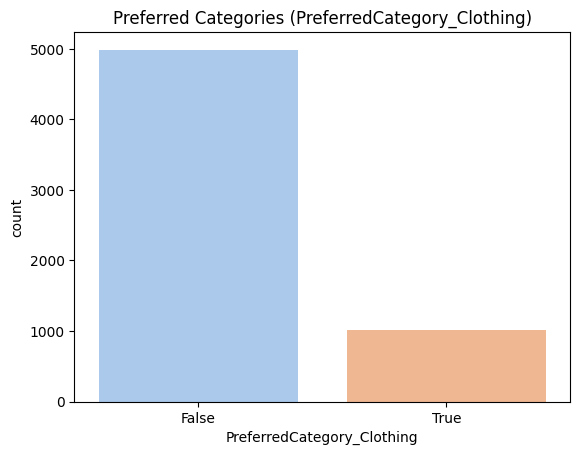

<ipython-input-4-b0b5e1cbcded>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="pastel")


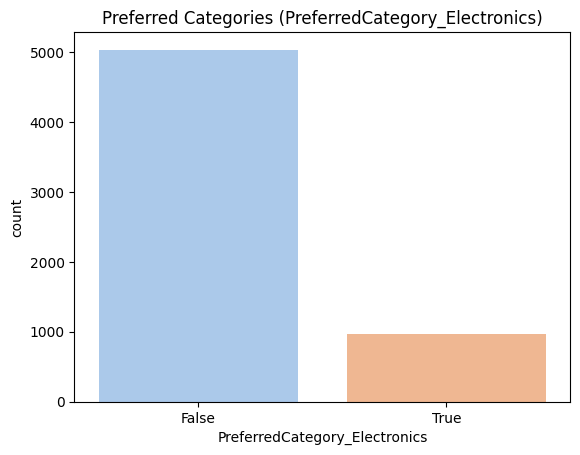

<ipython-input-4-b0b5e1cbcded>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="pastel")


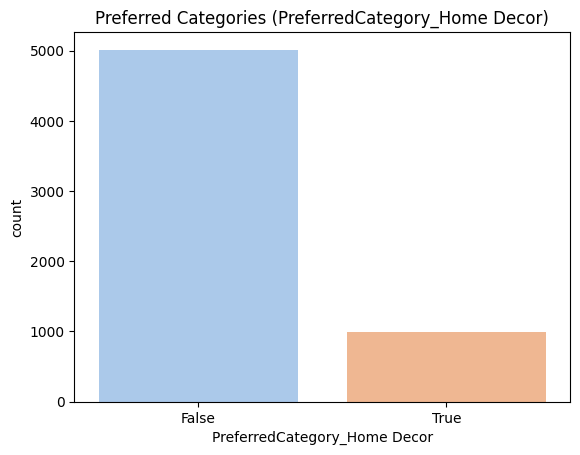

<ipython-input-4-b0b5e1cbcded>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="pastel")


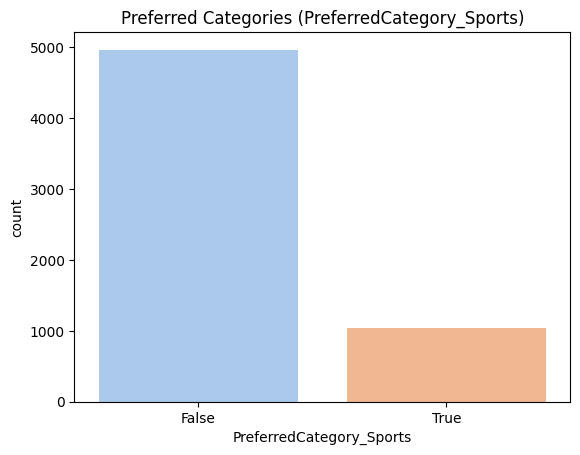

<ipython-input-4-b0b5e1cbcded>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="pastel")


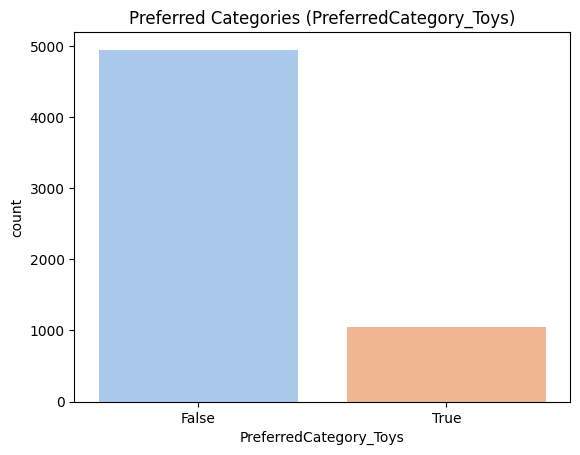

In [4]:
# Spending Score by Membership Tier
membership_tier_columns = [col for col in data.columns if "MembershipTier" in col]
for col in membership_tier_columns:
    sns.boxplot(x=data[col], y=data["SpendingScore"])
    plt.title(f"Spending Score by {col}")
    plt.show()

# Popular PreferredCategory by Region
preferred_columns = [col for col in data.columns if "PreferredCategory" in col]
for col in preferred_columns:
    sns.countplot(x=data[col], palette="pastel")
    plt.title(f"Preferred Categories ({col})")
    plt.show()


Confusion Matrix:
 [[511 370]
 [510 409]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54       881
           1       0.53      0.45      0.48       919

    accuracy                           0.51      1800
   macro avg       0.51      0.51      0.51      1800
weighted avg       0.51      0.51      0.51      1800



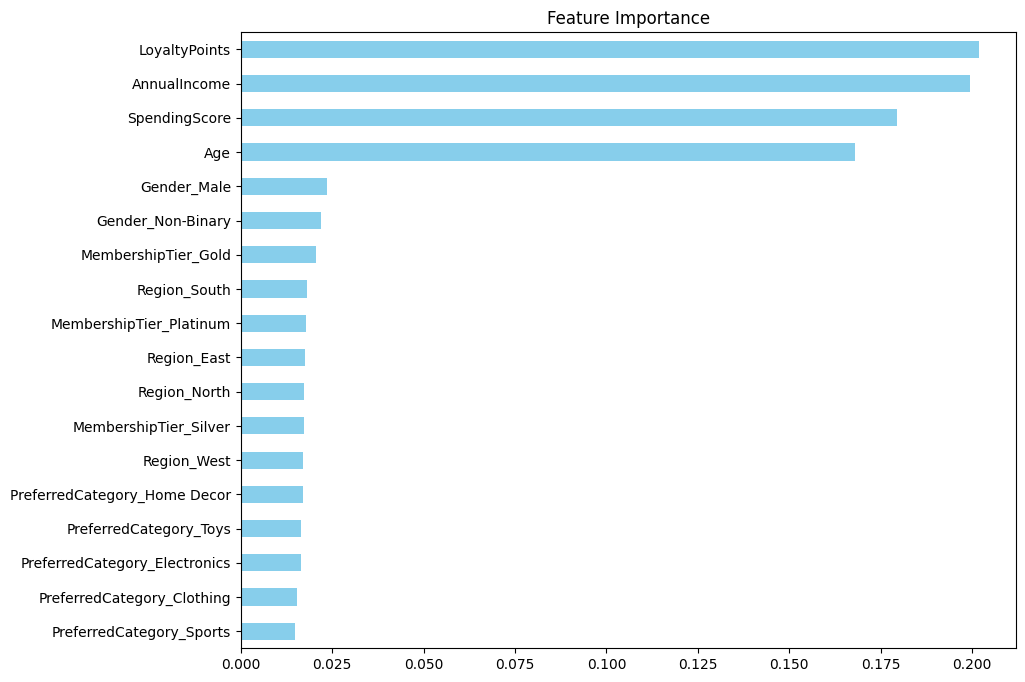

In [6]:
# Define target and features
data["RecentPurchase_Yes"] = data["RecentPurchase_Yes"].astype(int)
y = data["RecentPurchase_Yes"]
X = data.drop(columns=["RecentPurchase_Yes", "Cluster"])  # Removed 'RecentPurchase_No'

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(10, 8), color="skyblue")
plt.title("Feature Importance")
plt.show()


Churn
0    5128
1     872
Name: count, dtype: int64


<ipython-input-14-3cc8d4c9a52f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["Churn"], palette="pastel")


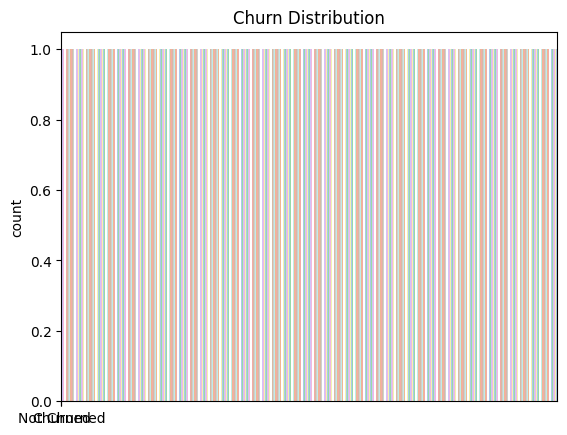

In [14]:
# Define a churn indicator
data["Churn"] = ((data["SpendingScore"] < data["SpendingScore"].quantile(0.3)) &
                 (data["RecentPurchase_Yes"] == 0)).astype(int)

# Check the churn distribution
print(data["Churn"].value_counts())

# Visualize churn distribution
sns.countplot(data["Churn"], palette="pastel")
plt.title("Churn Distribution")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.show()


In [16]:
print(data.columns)


Index(['Age', 'AnnualIncome', 'SpendingScore', 'LoyaltyPoints', 'Gender_Male',
       'Gender_Non-Binary', 'MembershipTier_Gold', 'MembershipTier_Platinum',
       'MembershipTier_Silver', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'PreferredCategory_Clothing',
       'PreferredCategory_Electronics', 'PreferredCategory_Home Decor',
       'PreferredCategory_Sports', 'PreferredCategory_Toys',
       'RecentPurchase_Yes', 'Cluster', 'AverageOrderValue',
       'PurchaseFrequency', 'RetentionRate', 'CustomerLifetimeValue', 'Churn'],
      dtype='object')


In [17]:
# Define features (X) and target (y)
X = data.drop(columns=["Churn", "Cluster"])  # Drop 'Churn' and 'Cluster' columns
y = data["Churn"]  # Churn column is the target variable

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 4200
Testing samples: 1800


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the Random Forest classifier
churn_model = RandomForestClassifier(random_state=42)
churn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = churn_model.predict(X_test)
y_prob = churn_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[1540    0]
 [   0  260]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1540
           1       1.00      1.00      1.00       260

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

ROC AUC Score: 1.0


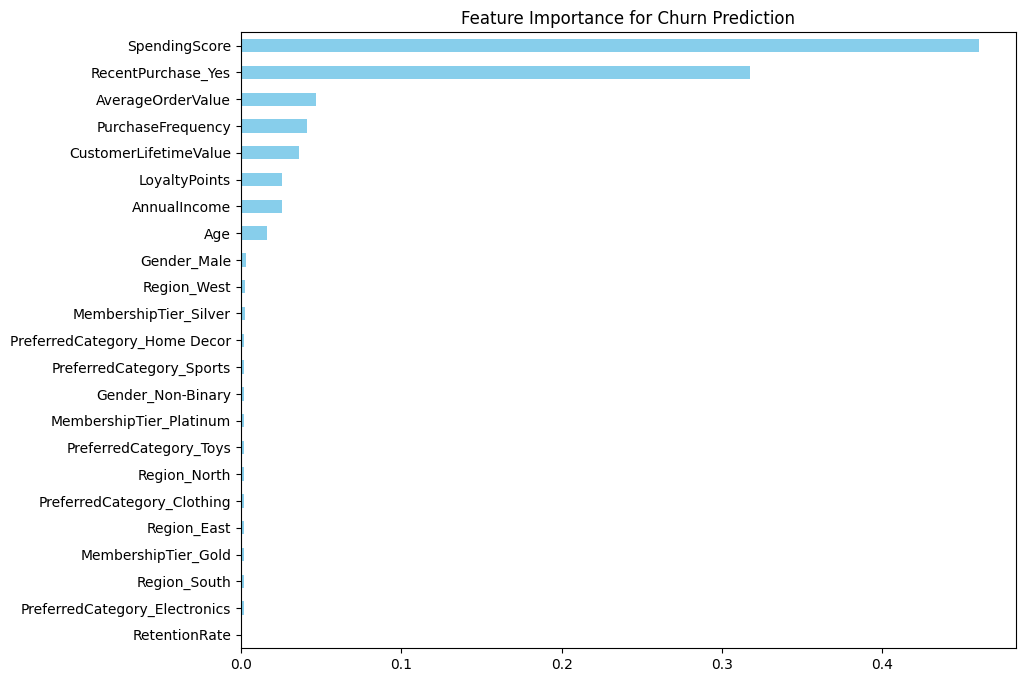

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importances = pd.Series(churn_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(10, 8), color="skyblue")
plt.title("Feature Importance for Churn Prediction")
plt.show()


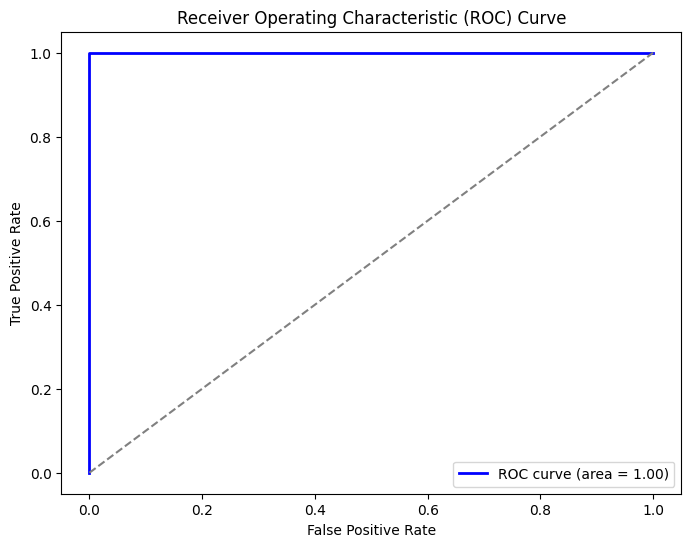

In [20]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [21]:
# Predict churn for the entire dataset (not just the test set)
data["Predicted_Churn"] = churn_model.predict(X)

# Identify customers who are likely to churn
churned_customers = data[data["Predicted_Churn"] == 1]
print("Sample of Churned Customers:\n", churned_customers.head())


Sample of Churned Customers:
          Age  AnnualIncome  SpendingScore  LoyaltyPoints  Gender_Male  \
20 -0.281446      1.060428      -1.428308      -1.011392        False   
30  0.049109      0.452687      -1.602589      -1.316523         True   
31 -1.339222     -1.308086      -1.463164       1.672853        False   
39  0.644109      1.044799      -1.254027       1.034061         True   
46  1.503552      0.896847      -1.079746       1.629014         True   

    Gender_Non-Binary  MembershipTier_Gold  MembershipTier_Platinum  \
20               True                False                    False   
30              False                False                    False   
31               True                 True                    False   
39              False                False                    False   
46              False                 True                    False   

    MembershipTier_Silver  Region_East  ...  PreferredCategory_Sports  \
20                   True      